## Final Project Submission

Please fill out:
* Student name: SILVIA GWORIT
* Student pace: full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: MWIKALI
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## INTRODUCTION
As Microsoft plans to start a new movie studio, the main purpose of this project is to come up with actionable insights through exploratory data analysis for the company to use for there new venture. 

## BUSINESS UNDERSTANDING
## ~ Objectives
Find the most poular genres​

Find the most popular studios in the market​

Know the relationship between the production budget and the worldwide gross​

Know the relationship between the production budget and profit​

## Importing Relevant Libraries

In [2]:
# Importing libraries
import numpy as np
import pandas as pd 
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the datasets we will use
bom_movies = pd.read_csv('zippedData/bom.movie_gross 2.csv')
tmdb_movies = pd.read_csv('zippeddata/tmdb.movies.csv')
tn_movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='unicode_escape')

## Exploring the Dataframes

 ## a) bom_movies

In [4]:
# View the first 5 rows bom_movies dataset
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# information on bom_movies dataset
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
bom_movies.shape

(3387, 5)

## b)tn_movie_budget

In [7]:
# Viewing the first 5 rows
tn_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
#Information on the dataframe
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
tn_movie_budget.shape

(5782, 6)

## c) rt_movie

In [10]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [12]:
rt_movie.shape

(1560, 12)

## CLEANING THE DATA

## a) bom_movies

In [13]:
bom_movies.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [14]:
# Changing the 'froeign_gross' column datatype
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].astype(str)
bom_movies['foreign_gross'] = bom_movies['foreign_gross'].str.replace(',', '')
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')
non_numeric_values = bom_movies['foreign_gross'][bom_movies['foreign_gross'].isna()]
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [15]:
#checking for missing values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
# Dropping columns with missing rows
bom_movies.dropna(subset = ['studio','domestic_gross','foreign_gross'] , inplace = True)
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
# Checking for duplicate rows 
bom_movies.duplicated().sum()

0

In [18]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


## b) tn_movie_budget

In [19]:
# checking for missing values
tn_movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
# checking for duplicate values
tn_movie_budget.duplicated().sum()

0

In [21]:
# removing the $ sign from the 'production_budget', 'domestic_gross', 'worldwide_gross' columns
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

tn_movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']] = tn_movie_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].map(clean_currency).astype(float)

In [22]:
#Conver
tn_movie_budget['release_date'] = pd.to_datetime(tn_movie_budget['release_date'])
tn_movie_budget['year'] = tn_movie_budget['release_date'].dt.strftime('%Y')
tn_movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015


In [23]:
# Creating a column profit column using the production_budget and domestic_gross columns
tn_movie_budget['profit'] = tn_movie_budget['production_budget'] - tn_movie_budget['domestic_gross']

In [24]:
# Sorting the table by year
tn_movie_budget = tn_movie_budget.sort_values(by='year')
tn_movie_budget.set_index('id', inplace=True)

In [25]:
# removing rows in domestic_gross and production budget with o values
tn_movie_budget = tn_movie_budget[(tn_movie_budget['domestic_gross'] != 0.0) & (tn_movie_budget['production_budget'] != 0.0)]
# Changing the year column datatype
tn_movie_budget['year'] = tn_movie_budget['year'].astype(int)

df = pd.DataFrame(tn_movie_budget)
df


,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit
id,,,,,,,
78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,1915,-9890000.0
15,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,1916,-7800000.0
84,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,1920,-2900000.0
70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,1925,-5100000.0
7,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,1925,-10755000.0
...,...,...,...,...,...,...,...
94,2019-03-15,Wonder Park,100000000.0,45216793.0,115149422.0,2019,54783207.0
97,2019-03-15,Captive State,25000000.0,5958315.0,8993300.0,2019,19041685.0
33,2019-03-29,Unplanned,6000000.0,18107621.0,18107621.0,2019,-12107621.0


In [26]:
tn_movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit
id,,,,,,,
78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,1915,-9890000.0
15,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,1916,-7800000.0
84,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,1920,-2900000.0
70,1925-12-30,Ben-Hur: A Tale of the Christ,3900000.0,9000000.0,9000000.0,1925,-5100000.0
7,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,1925,-10755000.0


In [27]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 78 to 36
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5234 non-null   datetime64[ns]
 1   movie              5234 non-null   object        
 2   production_budget  5234 non-null   float64       
 3   domestic_gross     5234 non-null   float64       
 4   worldwide_gross    5234 non-null   float64       
 5   year               5234 non-null   int64         
 6   profit             5234 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 327.1+ KB


## c) rt_movie

In [28]:
# checking for missing values
rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [29]:
# dropping rows with missing values
rt_movie.dropna(subset =['synopsis','rating','director', 'writer' ,'theater_date','dvd_date', 'currency','box_office','runtime','studio'] , inplace = True)
rt_movie.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [30]:
# checking for duplicate values
rt_movie.duplicated().sum()

0

In [31]:
#removing the | from the genre column and splitting elements in the genre column 
rt_movie = rt_movie.assign(genre=rt_movie.genre.str.split('|'))

In [32]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,[Comedy],Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,[Drama],Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,"[Comedy, Drama, Mystery and Suspense]",George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,"[Action and Adventure, Drama, Science Fiction ...",Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [33]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


## Merging the datasets

In [34]:
# renaming the column names that will be used to join the tables
tn_movie_budget.rename(columns = {'movie':'title'}, inplace = True)
tmdb_movies.rename(columns = {'original_title': 'title'}, inplace = True)

In [35]:
# Joining rt_movie to tn_movie_budget
df1 =tn_movie_budget.merge(rt_movie, how = 'inner', on = 'id')
df1.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,year,profit,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,25,1929-02-01,The Broadway Melody,379000.0,2800000.0,4358000.0,1929,-2421000.0,"From ancient Japan's most enduring tale, the e...",PG-13,"[Action and Adventure, Drama, Science Fiction ...",Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
1,3,1933-03-09,42nd Street,439000.0,1438000.0,2281000.0,1933,-999000.0,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,10,1943-01-23,Casablanca,1039000.0,10462500.0,10496855.0,1943,-9423500.0,Some cast and crew from NBC's highly acclaimed...,PG-13,[Comedy],Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
3,61,1946-12-20,Itâs a Wonderful Life,3180000.0,6600000.0,10768908.0,1946,-3420000.0,Death once again shows he's determined to get ...,R,"[Action and Adventure, Drama, Horror, Mystery ...",James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,"54,100,000",93 minutes,New Line Cinema
4,3,1947-11-11,Gentleman's Agreement,2000000.0,7800000.0,7800000.0,1947,-5800000.0,"New York City, not-too-distant-future: Eric Pa...",R,"[Drama, Science Fiction and Fantasy]",David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 573 non-null    int64         
 1   release_date       573 non-null    datetime64[ns]
 2   title              573 non-null    object        
 3   production_budget  573 non-null    float64       
 4   domestic_gross     573 non-null    float64       
 5   worldwide_gross    573 non-null    float64       
 6   year               573 non-null    int64         
 7   profit             573 non-null    float64       
 8   synopsis           573 non-null    object        
 9   rating             573 non-null    object        
 10  genre              573 non-null    object        
 11  director           573 non-null    object        
 12  writer             573 non-null    object        
 13  theater_date       573 non-null    object        
 14  dvd_date  

In [37]:
# Joining bom_movies to the first dataframe
df2 =df1.merge(bom_movies ,on= 'title')
df2.head()

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,year_x,profit,synopsis,rating,...,theater_date,dvd_date,currency,box_office,runtime,studio_x,studio_y,domestic_gross_y,foreign_gross,year_y
0,13,2010-07-09,[Rec] 2,5600000.0,27766.0,18527766.0,2010,5572234.0,"Stewart Kane, an Irishman living in the Austra...",R,...,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,Magn.,27800.0,18500000.0,2010
1,22,2010-06-04,Get Him to the Greek,40000000.0,61153526.0,91455875.0,2010,-21153526.0,Two-time Academy Award Winner Kevin Spacey giv...,R,...,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,Uni.,61000000.0,30300000.0,2010
2,25,2010-12-29,Blue Valentine,1000000.0,9737892.0,16566240.0,2010,-8737892.0,"From ancient Japan's most enduring tale, the e...",PG-13,...,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures,Wein.,9700000.0,2600000.0,2010
3,95,2010-03-12,Our Family Wedding,14000000.0,20255281.0,21410546.0,2010,-6255281.0,BLEED FOR THIS is the incredible true story of...,R,...,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films,FoxS,20300000.0,1200000.0,2010
4,95,2010-08-27,Takers,32000000.0,57744720.0,70587268.0,2010,-25744720.0,BLEED FOR THIS is the incredible true story of...,R,...,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films,SGem,57700000.0,11300000.0,2010


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 105 non-null    int64         
 1   release_date       105 non-null    datetime64[ns]
 2   title              105 non-null    object        
 3   production_budget  105 non-null    float64       
 4   domestic_gross_x   105 non-null    float64       
 5   worldwide_gross    105 non-null    float64       
 6   year_x             105 non-null    int64         
 7   profit             105 non-null    float64       
 8   synopsis           105 non-null    object        
 9   rating             105 non-null    object        
 10  genre              105 non-null    object        
 11  director           105 non-null    object        
 12  writer             105 non-null    object        
 13  theater_date       105 non-null    object        
 14  dvd_date  

## Exploratory Analysis

## ~Questions to answer

## 1. What is the most popular genre

In [39]:
# Separating the elements in the genre column and counting how many times they appear
top_genres_counts = df2['genre'].explode().value_counts()
top_genres_counts

genre
Drama                          95
Comedy                         39
Science Fiction and Fantasy    19
Mystery and Suspense           18
Action and Adventure           18
Art House and International    12
Musical and Performing Arts    12
Sports and Fitness             11
Horror                          7
Name: count, dtype: int64

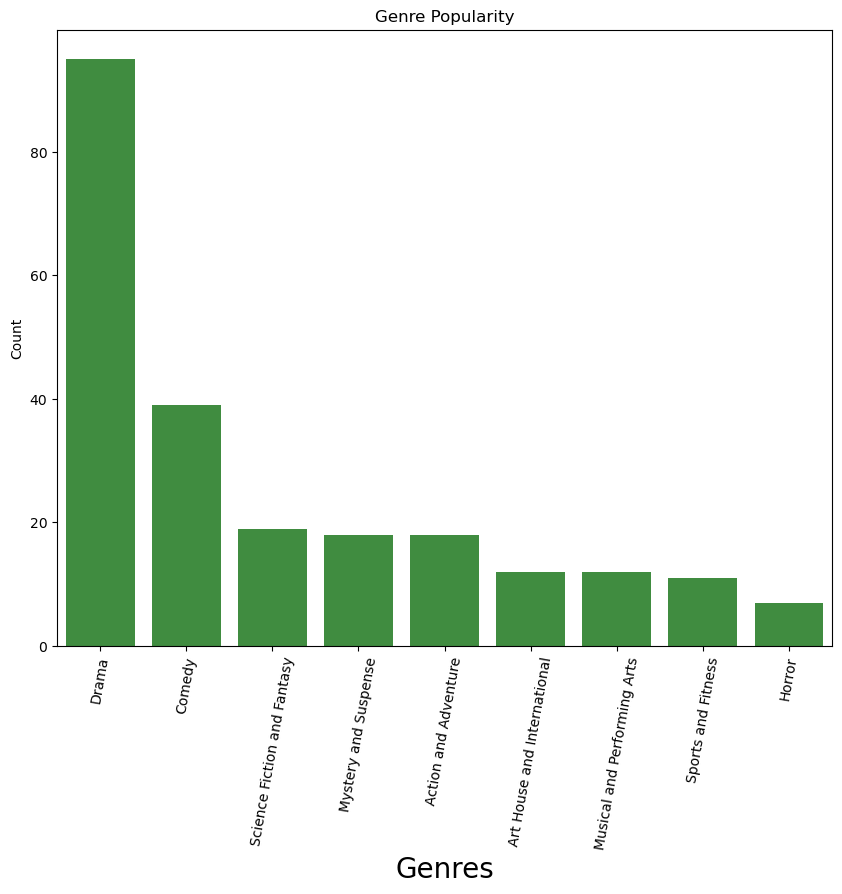

In [40]:
# plotting a bar chart on the top genre counts
plt.figure(figsize=(10, 8))

sns.barplot(x=top_genres_counts.index, y=top_genres_counts.values, alpha=0.8, color = 'green')
plt.title('Genre Popularity')
plt.xlabel('Genres',fontsize= 20)
plt.ylabel('Count',fontsize =10)

# Rotate the labels by 80 degrees
plt.xticks(rotation=80)

plt.show()

From the plotted graph we can see that the most popular genre is Drama as it is the most watched

## 2. What is the relationship between the production budget and the Worldwide gross

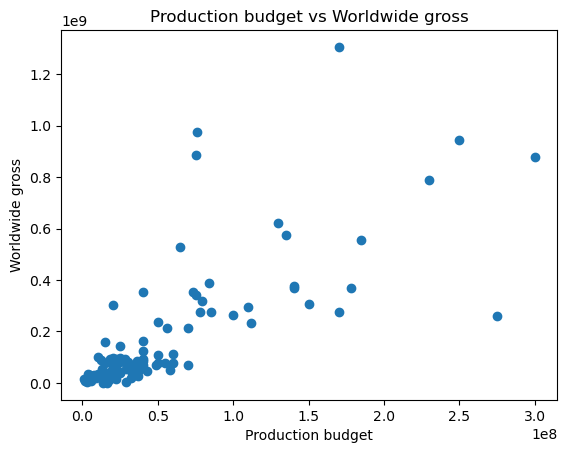

In [41]:
# Create the scatter plot
plt.scatter(df2['production_budget'], df2['worldwide_gross'])
plt.xlabel('Production budget')
plt.ylabel('Worldwide gross')
plt.title('Production budget vs Worldwide gross')
plt.show()

As we have seen the plot above results in to a positive correlation hence an increase in production budget will lead to an increase in the worldwide gross

## 3. What is the relationship betwen the production budget and profit

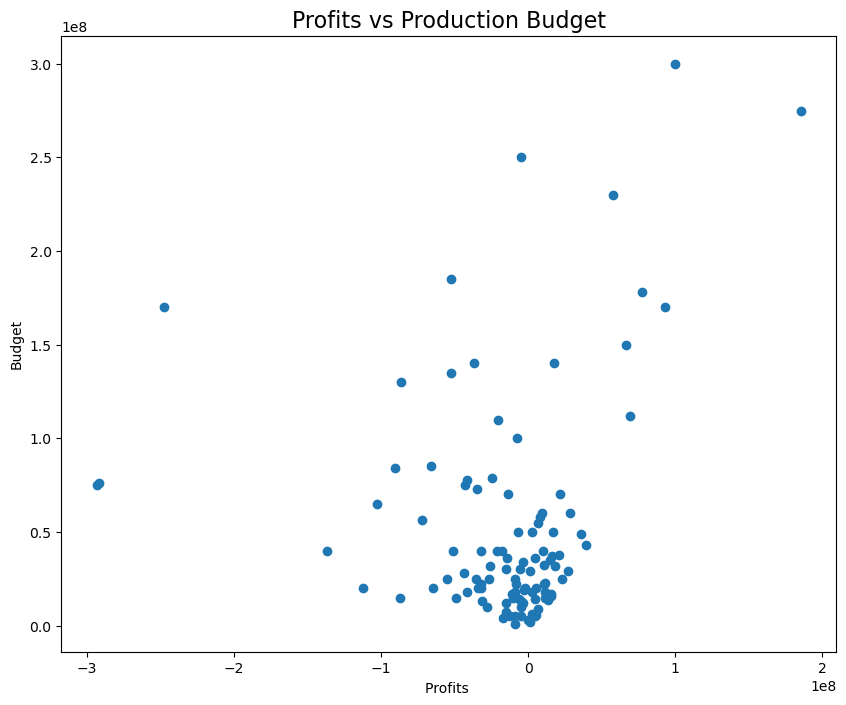

In [47]:
# plotting a scatterplot

fig, ax= plt.subplots(figsize=(10,8))

y = df2['production_budget']
x = df2['profit']

ax.scatter(x,y)

ax.set_title('Profits vs Production Budget', fontsize=16)
ax.set_ylabel("Budget",fontsize=10)
ax.set_xlabel("Profits ", fontsize=10)
fig.savefig('Budget vs Revenue.png');

From the plot above we can see that the production budget and the profit have a moderate correlation where a higher production budget will yeild a higher profit

## 4. What are the most popular studios

In [43]:
studio_count = df2['studio_x'].value_counts()

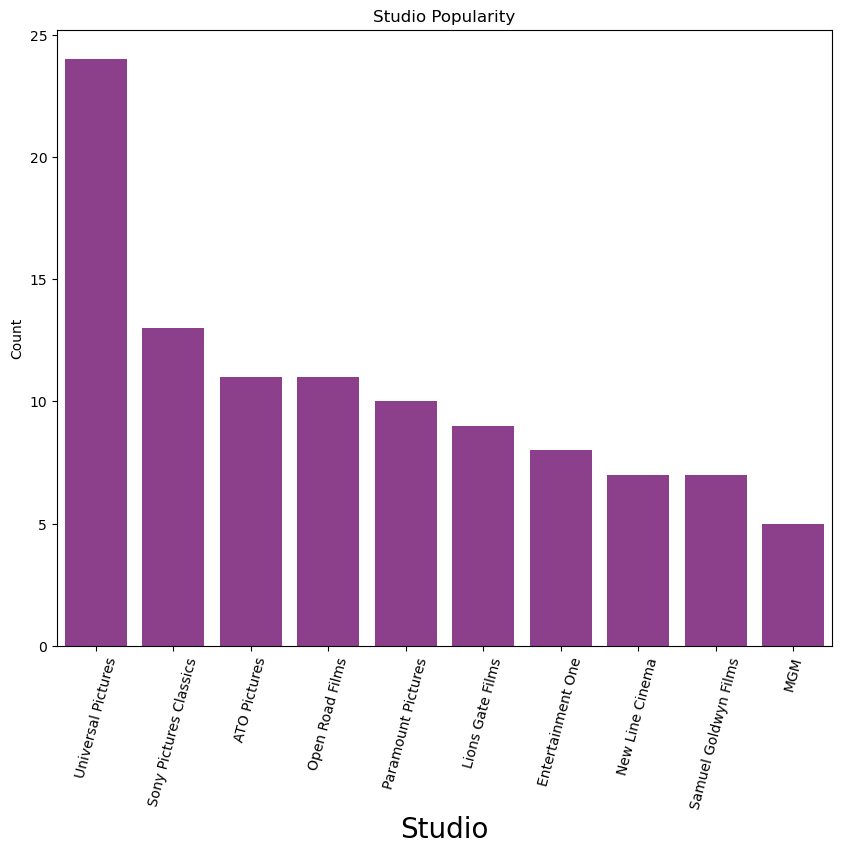

In [48]:
# plotting a bar chart on the top genre counts
plt.figure(figsize=(10, 8))

sns.barplot(x=studio_count.index, y=studio_count.values, alpha=0.8, color = 'purple')
plt.title('Studio Popularity')
plt.xlabel('Studio',fontsize= 20)
plt.ylabel('Count',fontsize =10)

# Rotate the labels by 75 degrees
plt.xticks(rotation=75)

plt.show()

## Conclusion

From the analysis done above we are able to generate insights for the set up of the new venture the company plans to take up.

We are able to see that the genre most people tend to garvitate towards is drama as it is the most poular genre

We have also established that the studios with the most productions are Universal pictures and Sony Pictures Clasics

Another observation is that a higher production budget generates a higher worldwide gross

Lastly a high production could yeild a slight profit

## Reccomendations

Microsoft should base production on mostly drama and comedy movies as they are the most popular.
During reesearch , Microsoft should focus on studios such as Universal Pictures and Sony Pictures Clasics as they are the best performing studios.
